<a href="https://colab.research.google.com/github/MikeTsvirkunov/ColabProject/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import pandas as pd
from os import walk
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from random import choice
from scipy.stats import normaltest
from sklearn.preprocessing import OneHotEncoder

#Settings of env.

In [ ]:
!apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!unzip '/content/gdrive/MyDrive/Colab Notebooks/Task6/archive.zip'

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Task6/archive.zip
  inflating: top250parkinsonsgenes.csv- BYFOLDCHANGE.csv  
  inflating: top250parkinsonsgenes.xlsx  
  inflating: top250parkinsonsgenes.xlsx - by PVALUE.csv  


#Load DataFrame
Импортируйте датасет в ноутбук средствами pandas. Посмотрите на первые 5 и последние 5 строк датафрейма. Выведите информацию о типах данных в наборе, а также основную статистическую информацию о данных. Удалите дубликаты строк.

##Load

In [ ]:
filename = list(filter(lambda a: "PVALUE.csv" in a, next(walk("."), (None, None, []))[2]))
filename

['top250parkinsonsgenes.xlsx - by PVALUE.csv']

In [ ]:
df = pd.read_csv("./"+filename[0])

In [ ]:
len(df.index)

250

In [ ]:
df

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
0,217094_s_at,0.689,0.000039,4.376080,0.213,0.649475,ITCH,itchy E3 ubiquitin protein ligase
1,208666_s_at,0.689,0.000077,-4.188349,-0.173,-0.469233,ST13,suppression of tumorigenicity 13 (colon carcin...
2,219437_s_at,0.689,0.000130,4.041613,-0.469,0.896316,ANKRD11,ankyrin repeat domain 11
3,211971_s_at,0.689,0.000205,-3.908721,-0.733,-0.360352,LRPPRC,leucine rich pentatricopeptide repeat containing
4,205398_s_at,0.689,0.000206,-3.907682,-0.735,-0.863359,SMAD3,SMAD family member 3
...,...,...,...,...,...,...,...,...
245,50965_at,0.809,0.009341,2.669860,-2.927,0.378223,RAB26,"RAB26, member RAS oncogene family"
246,201560_at,0.809,0.009365,-2.668921,-2.928,-0.550403,CLIC4,chloride intracellular channel 4
247,216417_x_at,0.809,0.009394,2.667778,-2.930,0.911768,HOXB9,homeobox B9
248,207187_at,0.809,0.009460,2.665167,-2.934,0.406586,JAK3,Janus kinase 3


##Посмотрите на первые 5 и последние 5 строк датафрейма

In [ ]:
df

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
0,217094_s_at,0.689,0.000039,4.376080,0.213,0.649475,ITCH,itchy E3 ubiquitin protein ligase
1,208666_s_at,0.689,0.000077,-4.188349,-0.173,-0.469233,ST13,suppression of tumorigenicity 13 (colon carcin...
2,219437_s_at,0.689,0.000130,4.041613,-0.469,0.896316,ANKRD11,ankyrin repeat domain 11
3,211971_s_at,0.689,0.000205,-3.908721,-0.733,-0.360352,LRPPRC,leucine rich pentatricopeptide repeat containing
4,205398_s_at,0.689,0.000206,-3.907682,-0.735,-0.863359,SMAD3,SMAD family member 3
...,...,...,...,...,...,...,...,...
245,50965_at,0.809,0.009341,2.669860,-2.927,0.378223,RAB26,"RAB26, member RAS oncogene family"
246,201560_at,0.809,0.009365,-2.668921,-2.928,-0.550403,CLIC4,chloride intracellular channel 4
247,216417_x_at,0.809,0.009394,2.667778,-2.930,0.911768,HOXB9,homeobox B9
248,207187_at,0.809,0.009460,2.665167,-2.934,0.406586,JAK3,Janus kinase 3


In [ ]:
df.head

<bound method NDFrame.head of               ID  adj.P.Val   P.Value         t      B     logFC Gene.symbol  \
0    217094_s_at      0.689  0.000039  4.376080  0.213  0.649475        ITCH   
1    208666_s_at      0.689  0.000077 -4.188349 -0.173 -0.469233        ST13   
2    219437_s_at      0.689  0.000130  4.041613 -0.469  0.896316     ANKRD11   
3    211971_s_at      0.689  0.000205 -3.908721 -0.733 -0.360352      LRPPRC   
4    205398_s_at      0.689  0.000206 -3.907682 -0.735 -0.863359       SMAD3   
..           ...        ...       ...       ...    ...       ...         ...   
245     50965_at      0.809  0.009341  2.669860 -2.927  0.378223       RAB26   
246    201560_at      0.809  0.009365 -2.668921 -2.928 -0.550403       CLIC4   
247  216417_x_at      0.809  0.009394  2.667778 -2.930  0.911768       HOXB9   
248    207187_at      0.809  0.009460  2.665167 -2.934  0.406586        JAK3   
249    212829_at      0.809  0.009482 -2.664315 -2.935 -0.333320     PIP4K2A   

         

##Информация о типах данных в наборе

In [ ]:
df.dtypes

ID              object
adj.P.Val      float64
P.Value        float64
t              float64
B              float64
logFC          float64
Gene.symbol     object
Gene.title      object
dtype: object

##Основная статистика информации о данных

In [ ]:
df.mean()

<ipython-input-12-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


adj.P.Val    0.761748
P.Value      0.004594
t            0.615648
B           -2.343780
logFC        0.132611
dtype: float64

In [ ]:
df.median()

<ipython-input-13-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


adj.P.Val    0.809000
P.Value      0.004798
t            2.758563
B           -2.547000
logFC        0.362526
dtype: float64

In [ ]:
df.describe()

,adj.P.Val,P.Value,t,B,logFC
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.761748,0.004594,0.615648,-2.343780,0.132611
std,0.055125,0.002764,2.979628,0.551552,0.612605
min,0.689000,0.000039,-4.188349,-2.935000,-1.261720
25%,0.689000,0.002099,-2.813428,-2.761000,-0.373815
50%,0.809000,0.004798,2.758563,-2.547000,0.362526
75%,0.809000,0.006984,3.029811,-2.072500,0.645196
max,0.809000,0.009482,4.376080,0.213000,1.148714


##Удалите дубликаты строк

In [ ]:
df = df.drop_duplicates()

#Task4
Удалите из датафрейма (если есть соответствующие поля) такие поля, как ID объектов. Переименуйте произвольное поле датафрейма.


##Удалите из датафрейма (если есть соответствующие поля) такие поля, как ID объектов

In [ ]:
df = df.drop(['ID'], axis=1)

##Переименуйте произвольное поле датафрейма.



In [ ]:
df = df.rename(columns={"P.Value": "MAS5-calculated Signal intensity"})

##Result

In [ ]:
df

,adj.P.Val,MAS5-calculated Signal intensity,t,B,logFC,Gene.symbol,Gene.title
0,0.689,0.000039,4.376080,0.213,0.649475,ITCH,itchy E3 ubiquitin protein ligase
1,0.689,0.000077,-4.188349,-0.173,-0.469233,ST13,suppression of tumorigenicity 13 (colon carcin...
2,0.689,0.000130,4.041613,-0.469,0.896316,ANKRD11,ankyrin repeat domain 11
3,0.689,0.000205,-3.908721,-0.733,-0.360352,LRPPRC,leucine rich pentatricopeptide repeat containing
4,0.689,0.000206,-3.907682,-0.735,-0.863359,SMAD3,SMAD family member 3
...,...,...,...,...,...,...,...
245,0.809,0.009341,2.669860,-2.927,0.378223,RAB26,"RAB26, member RAS oncogene family"
246,0.809,0.009365,-2.668921,-2.928,-0.550403,CLIC4,chloride intracellular channel 4
247,0.809,0.009394,2.667778,-2.930,0.911768,HOXB9,homeobox B9
248,0.809,0.009460,2.665167,-2.934,0.406586,JAK3,Janus kinase 3


#Task5
С помощью библиотек matplotlib, seaborn и pandas постройте следующие диаграммы:

In [ ]:
a = 'MAS5-calculated Signal intensity'

##Гистограмму распределения любого числового признака (используется один числовой столбец);


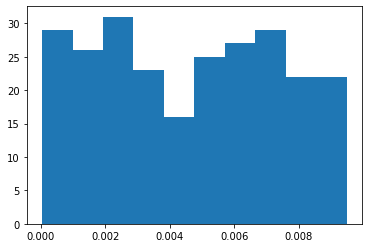

In [ ]:
plt.hist(df[a])
plt.savefig('Гистограмму распределения любого числового признака.png')

##диаграмму «ящик с усами» для любого числового признака (используется один числовой столбец);

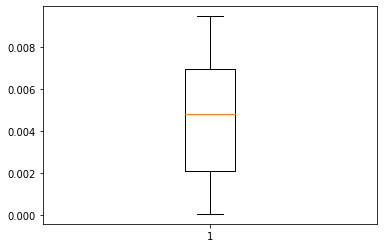

In [ ]:
plt.boxplot(x=df[a])
plt.savefig('диаграмму «ящик с усами» для любого числового признака.png')

##круговую диаграмму (выделите номинативный признак, например пол, и используйте количество соответствующих строк);


In [ ]:
# print(*(df[i].value_counts().max() for i in df.columns))
# df['Gene.symbol'].value_counts().index


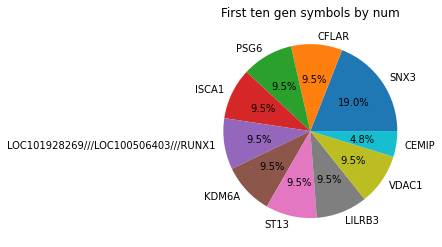

In [ ]:
plt.title("First ten gen symbols by num")
plt.pie(df['Gene.symbol'].value_counts().head(10), labels=(df['Gene.symbol'].value_counts().index)[:10], autopct='%1.1f%%')
plt.savefig('круговую диаграмму (выделите номинативный признак, например пол, и используйте количество соответствующих строк).png')

##тепловую карту со значениями взаимной корреляции между всеми парами признаков набора данных (значения корреляции должны быть выведены, размер рисунка подобрать так, чтобы было читаемо);

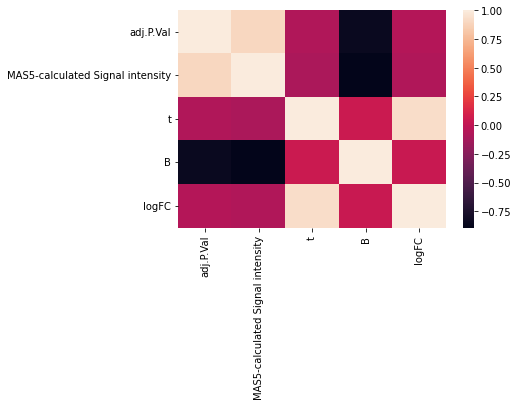

In [ ]:
fig = sns.heatmap(df.corr()).get_figure()
fig.savefig("тепловую карту со значениями взаимной корреляции между всеми парами признаков набора данных.png")

##Диаграмму countplot с группировкой по двум номинативным признакам.

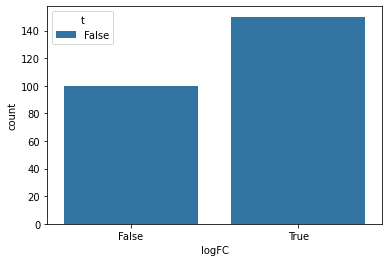

In [ ]:
k = df
k['logFC'] = k['logFC'].map(lambda a: a>0)
k['t'] = k['logFC'].map(lambda a: a>2)
fig = sns.countplot(data=k, x='logFC', hue='t').get_figure()
fig.savefig('Диаграмму countplot с группировкой по двум номинативным признакам.png')

#Task6
Проверьте наличие пропусков в данных. Если в каких либо столбцах присутствуют пропуски - заполните их в соответствии со следующим правилом:


1.   если значением признака является целое число, заполните значением медианы по данному столбцу;
2.   если значением признака является действительное число, заполните средним значением по данному столбцу;
3. иначе заполните значением моды по данному столбцу.



In [ ]:
df = df.apply(lambda a: a.fillna(a.mean() if a.dtypes == np.float64 else a.median() if a.dtypes == np.int64 else a.mode()))
df

,adj.P.Val,MAS5-calculated Signal intensity,t,B,logFC,Gene.symbol,Gene.title
0,0.689,0.000039,4.376080,0.213,0.649475,ITCH,itchy E3 ubiquitin protein ligase
1,0.689,0.000077,-4.188349,-0.173,-0.469233,ST13,suppression of tumorigenicity 13 (colon carcin...
2,0.689,0.000130,4.041613,-0.469,0.896316,ANKRD11,ankyrin repeat domain 11
3,0.689,0.000205,-3.908721,-0.733,-0.360352,LRPPRC,leucine rich pentatricopeptide repeat containing
4,0.689,0.000206,-3.907682,-0.735,-0.863359,SMAD3,SMAD family member 3
...,...,...,...,...,...,...,...
245,0.809,0.009341,2.669860,-2.927,0.378223,RAB26,"RAB26, member RAS oncogene family"
246,0.809,0.009365,-2.668921,-2.928,-0.550403,CLIC4,chloride intracellular channel 4
247,0.809,0.009394,2.667778,-2.930,0.911768,HOXB9,homeobox B9
248,0.809,0.009460,2.665167,-2.934,0.406586,JAK3,Janus kinase 3


#Выберите произвольный числовой признак, с помощью среза данных выберите не более 200 значений соответствующего признака. Проверьте полученную выборку с помощью normaltest на нормальность распределения.

In [ ]:
random_field = choice(list(filter(lambda a: df[a].dtypes != str, df.columns)))
random_field

'B'

In [ ]:
cut_df = df[0:50]
cut_df

,adj.P.Val,MAS5-calculated Signal intensity,t,B,logFC,Gene.symbol,Gene.title
0,0.689,0.000039,4.376080,0.213,0.649475,ITCH,itchy E3 ubiquitin protein ligase
1,0.689,0.000077,-4.188349,-0.173,-0.469233,ST13,suppression of tumorigenicity 13 (colon carcin...
2,0.689,0.000130,4.041613,-0.469,0.896316,ANKRD11,ankyrin repeat domain 11
3,0.689,0.000205,-3.908721,-0.733,-0.360352,LRPPRC,leucine rich pentatricopeptide repeat containing
4,0.689,0.000206,-3.907682,-0.735,-0.863359,SMAD3,SMAD family member 3
5,0.689,0.000273,3.824173,-0.898,0.647474,VDR,"vitamin D (1,25- dihydroxyvitamin D3) receptor"
6,0.689,0.000276,-3.821621,-0.903,-1.039596,NUDT4P1///NUDT4,nudix hydrolase 4 pseudogene 1///nudix hydrola...
7,0.689,0.000313,-3.783842,-0.976,-1.261720,DLG1,discs large MAGUK scaffold protein 1
8,0.689,0.000421,-3.694774,-1.148,-0.343811,ADO,2-aminoethanethiol dioxygenase
9,0.689,0.000489,3.649861,-1.233,0.501603,TMCO1,transmembrane and coiled-coil domains 1


In [ ]:
normaltest(cut_df['t'])

NormaltestResult(statistic=96.64368022816416, pvalue=1.032978977274927e-21)

#Выполните one-hot кодирование всех категориальных признаков.

In [ ]:
# one_hot = pd.get_dummies(df['Gene.symbol'])
# df = df.drop('Gene.symbol',axis = 1)
# df = df.join(one_hot)

In [ ]:
pd.get_dummies(df['Gene.symbol'], prefix='Gene_')

,Gene__6-Sep,Gene__AASDHPPT,Gene__ABCA1,Gene__ABCD2,Gene__ABCF2,Gene__ACACB,Gene__ACRV1,Gene__ACTN1,Gene__ADGRG3,Gene__ADH6,...,Gene__UBR5,Gene__UCHL1,Gene__UPF1,Gene__USH1C,Gene__VDAC1,Gene__VDR,Gene__WFDC2,Gene__ZFAND1,Gene__ZKSCAN8,Gene__ZMYM1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Сохраните предобработанный набор данных в файл csv.

In [ ]:
df.to_csv('out.csv')